<a href="https://colab.research.google.com/github/DMurengi2010/Projcts-/blob/main/Derrick_Muthaura_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

## **a) Specifying the Data Analytic Question**

How well can we predict which individuals are most likely to have or use a bank account?

# b) Defining the Metric for Success


1. Describe (graphically) the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
2. Explore the trends and patterns around financial inclusion in Kenya, Rwanda, Tanzania and Uganda. 
2. provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# **c) Understanding the context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts has been regarded as an indicator of financial inclusion.This is the premise of this analyis, to investigate and provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

# **d) Recording the Experimental Design**


Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.


Challenge your solution by providing insights on how you can make improvements. Defining the research question






# **e) Data Relevance**

The dataset contains demographic information and what financial services are used by individuals across East Africa. The data was extracted from various Finscope surveys ranging from 2016 to 2018.

# **Reading the data**

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [369]:
df1=pd.read_csv('https://bit.ly/FinancialDataset')

In [370]:
#checking the top 5 records of the data
df1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [371]:
#check the bottom 5 records
df1.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [372]:
#checking the no of records in our dataset
df1.shape

(23524, 13)

In [373]:
#checking the datatypes of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# Cleaning the dataset

In [374]:
#checking fot Null values
df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [375]:
#our research is on predicting individuals likely to have and or use bank accounts 
#so we do not need null values in our data. thats why we are dropping the null values
df1.dropna(axis=0,inplace=True )

In [376]:
df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [377]:
df1=df1.astype({'Respondent Age':'int','household_size':'int'})

In [378]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   uniqueid                23343 non-null  object
 3   Has a Bank account      23343 non-null  object
 4   Type of Location        23343 non-null  object
 5   Cell Phone Access       23343 non-null  object
 6   household_size          23343 non-null  int64 
 7   Respondent Age          23343 non-null  int64 
 8   gender_of_respondent    23343 non-null  object
 9   The relathip with head  23343 non-null  object
 10  marital_status          23343 non-null  object
 11  Level of Educuation     23343 non-null  object
 12  Type of Job             23343 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [379]:
#checking for duplicates
df1.duplicated().sum()
#our data has no duplicate values

0

In [380]:
#checking the unique years
df1['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [381]:
df1.drop(df1[df1['year']>2018].index,inplace = True)

In [382]:
#Confirming whether the unique years have been dropped
df1['year'].unique()

array([2018, 2016, 2017])

In [383]:
#checking if the Levels of Educuation are okay
df1['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [384]:

df1.drop(df1[df1['Level of Educuation']=='6'].index,inplace = True)

In [385]:
#confirming the Levels of Educuation are okay
df1['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [386]:
df1[df1['Respondent Age']>80].value_counts().sum()

335

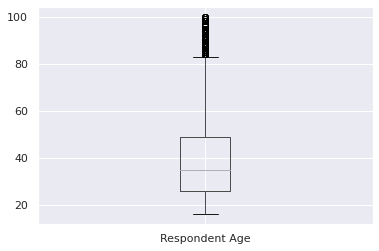

In [387]:
#checking for outliers in the Age column
df1.boxplot('Respondent Age')
#we do not drop the outliers because we will need to see if age is a factor that affects having bank accounts

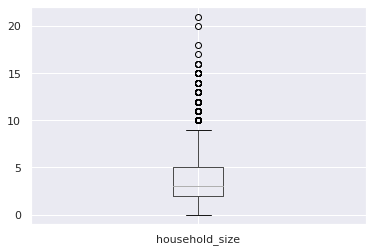

In [388]:
#checking for outliers
df1.boxplot('household_size')
#I dont have to drop the outliers in this case because some families can be large 
#and we would want to know if the household size affects having a bank account

# Exploratory Analysis

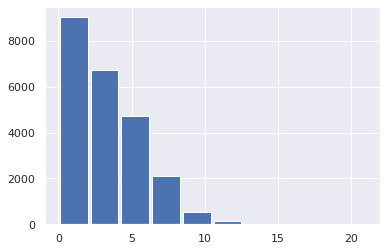

In [389]:
# Ploting histogram for household_size
x=[df1['household_size']]
plt.hist(x,bins=10,rwidth=0.9)
plt.show()
# The Histogram is positively skewed  meaning that more of the data is on the left-hand side of the distribution, we have a few large values to the right.
# Which shows that the mean is greater than the median

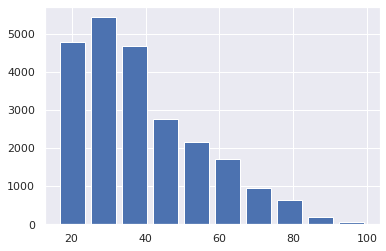

In [390]:
# Ploting histogram for Respondent Age
x=[df1['Respondent Age']]
plt.hist(x,bins=10,rwidth=0.8)
plt.show()
# The Histogram is positively skewed  meaning that more of the data is on the left-hand side of the distribution, we have a few large values to the right.
# Which shows that the mean is greater than the median

In [391]:
#checking for the measures of central tendency 
#i.e mean,median,mode, standard deviation,minimum and maximum values
#median = 50 percentile
df1.describe()

,year,household_size,Respondent Age
count,23313.000000,23313.000000,23313.000000
mean,2016.977952,3.688414,38.793549
std,0.849034,2.280842,16.510611
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [392]:
df1['Respondent Age'].median()

35.0

In [393]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23313 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23313 non-null  object
 1   year                    23313 non-null  int64 
 2   uniqueid                23313 non-null  object
 3   Has a Bank account      23313 non-null  object
 4   Type of Location        23313 non-null  object
 5   Cell Phone Access       23313 non-null  object
 6   household_size          23313 non-null  int64 
 7   Respondent Age          23313 non-null  int64 
 8   gender_of_respondent    23313 non-null  object
 9   The relathip with head  23313 non-null  object
 10  marital_status          23313 non-null  object
 11  Level of Educuation     23313 non-null  object
 12  Type of Job             23313 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


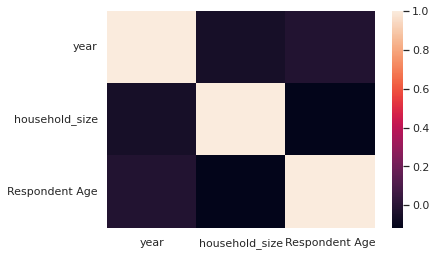

In [394]:
dataplot=sns.heatmap(df1.corr())
dataplot
#The heatmap shows that there is no correration in the data. Each datapoint is indipendent of the other

In [395]:
df2=df1.drop(['year','Type of Location','household_size','Respondent Age','The relathip with head','marital_status','Level of Educuation','Type of Job'],axis=1)
Table=df2.groupby(by=['country','gender_of_respondent','Has a Bank account','Cell Phone Access']).agg('count')
Table
#The table shows the number of people by gender and country that have access to bank accounts

uniqueid
country  gender_of_respondent Has a Bank account Cell Phone Access          
Kenya    Female               No                 No                      778
                                                 Yes                    2002
                              Yes                No                       33
                                                 Yes                     667
         Male                 No                 No                      443
                                                 Yes                    1320
                              Yes                No                       29
                                                 Yes                     790
Rwanda   Female               No                 No                      995
                                                 Yes                    3723
                              Yes                No                        6
                                                 Yes                     435
         Male                 No                 No                      454
                                                 Yes                    2500
                              Yes                No                       13
                                                 Yes                     539
Tanzania Female               No                 No                     1778
                                                 Yes                    1714
                              Yes                No                        6
                                                 Yes                     233
         Male                 No                 No                      821
                                                 Yes                    1586
                              Yes                No                        7
                                                 Yes                     352
Uganda   Female               No                 No                      447
                                                 Yes                     834
                              Yes                No                        6
                                                 Yes                      91
         Male                 No                 No                      178
                                                 Yes                     449
                              Yes                No                        4
                                                 Yes                      80

Text(0, 0.5, 'No of Respondents')

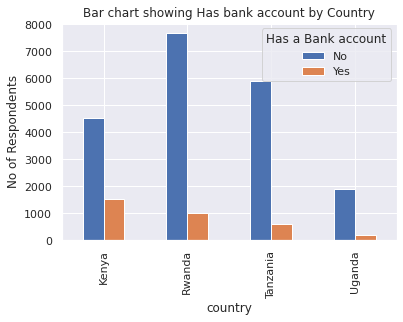

In [396]:
pd.crosstab(df1['country'], df1['Has a Bank account']).plot(kind='bar', stacked=False)
plt.title('Bar chart showing Has bank account by Country')
plt.ylabel("No of Respondents")
#The Graph show that Kenya has more people with bank accounts and Rwanda has the highest number of poeple with no bank accounts

Text(0, 0.5, 'No of Respondents')

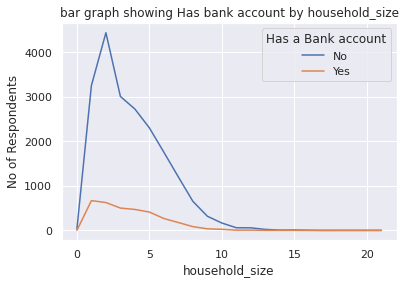

In [397]:
pd.crosstab(df1['household_size'], df1['Has a Bank account']).plot(kind='line')
plt.title("bar graph showing Has bank account by household_size")
plt.ylabel("No of Respondents")
#The plot shows that the lower the househod size the more the likelyhood of having a bank account

Text(0, 0.5, 'No of Respondents')

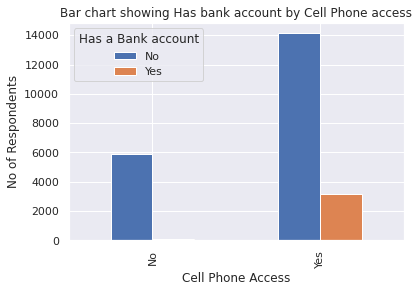

In [398]:
pd.crosstab(df1['Cell Phone Access'], df1['Has a Bank account']).plot(kind='bar')
plt.title('Bar chart showing Has bank account by Cell Phone access')
plt.ylabel("No of Respondents")
#The graph shows that more people with cell phone access have bank accounts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

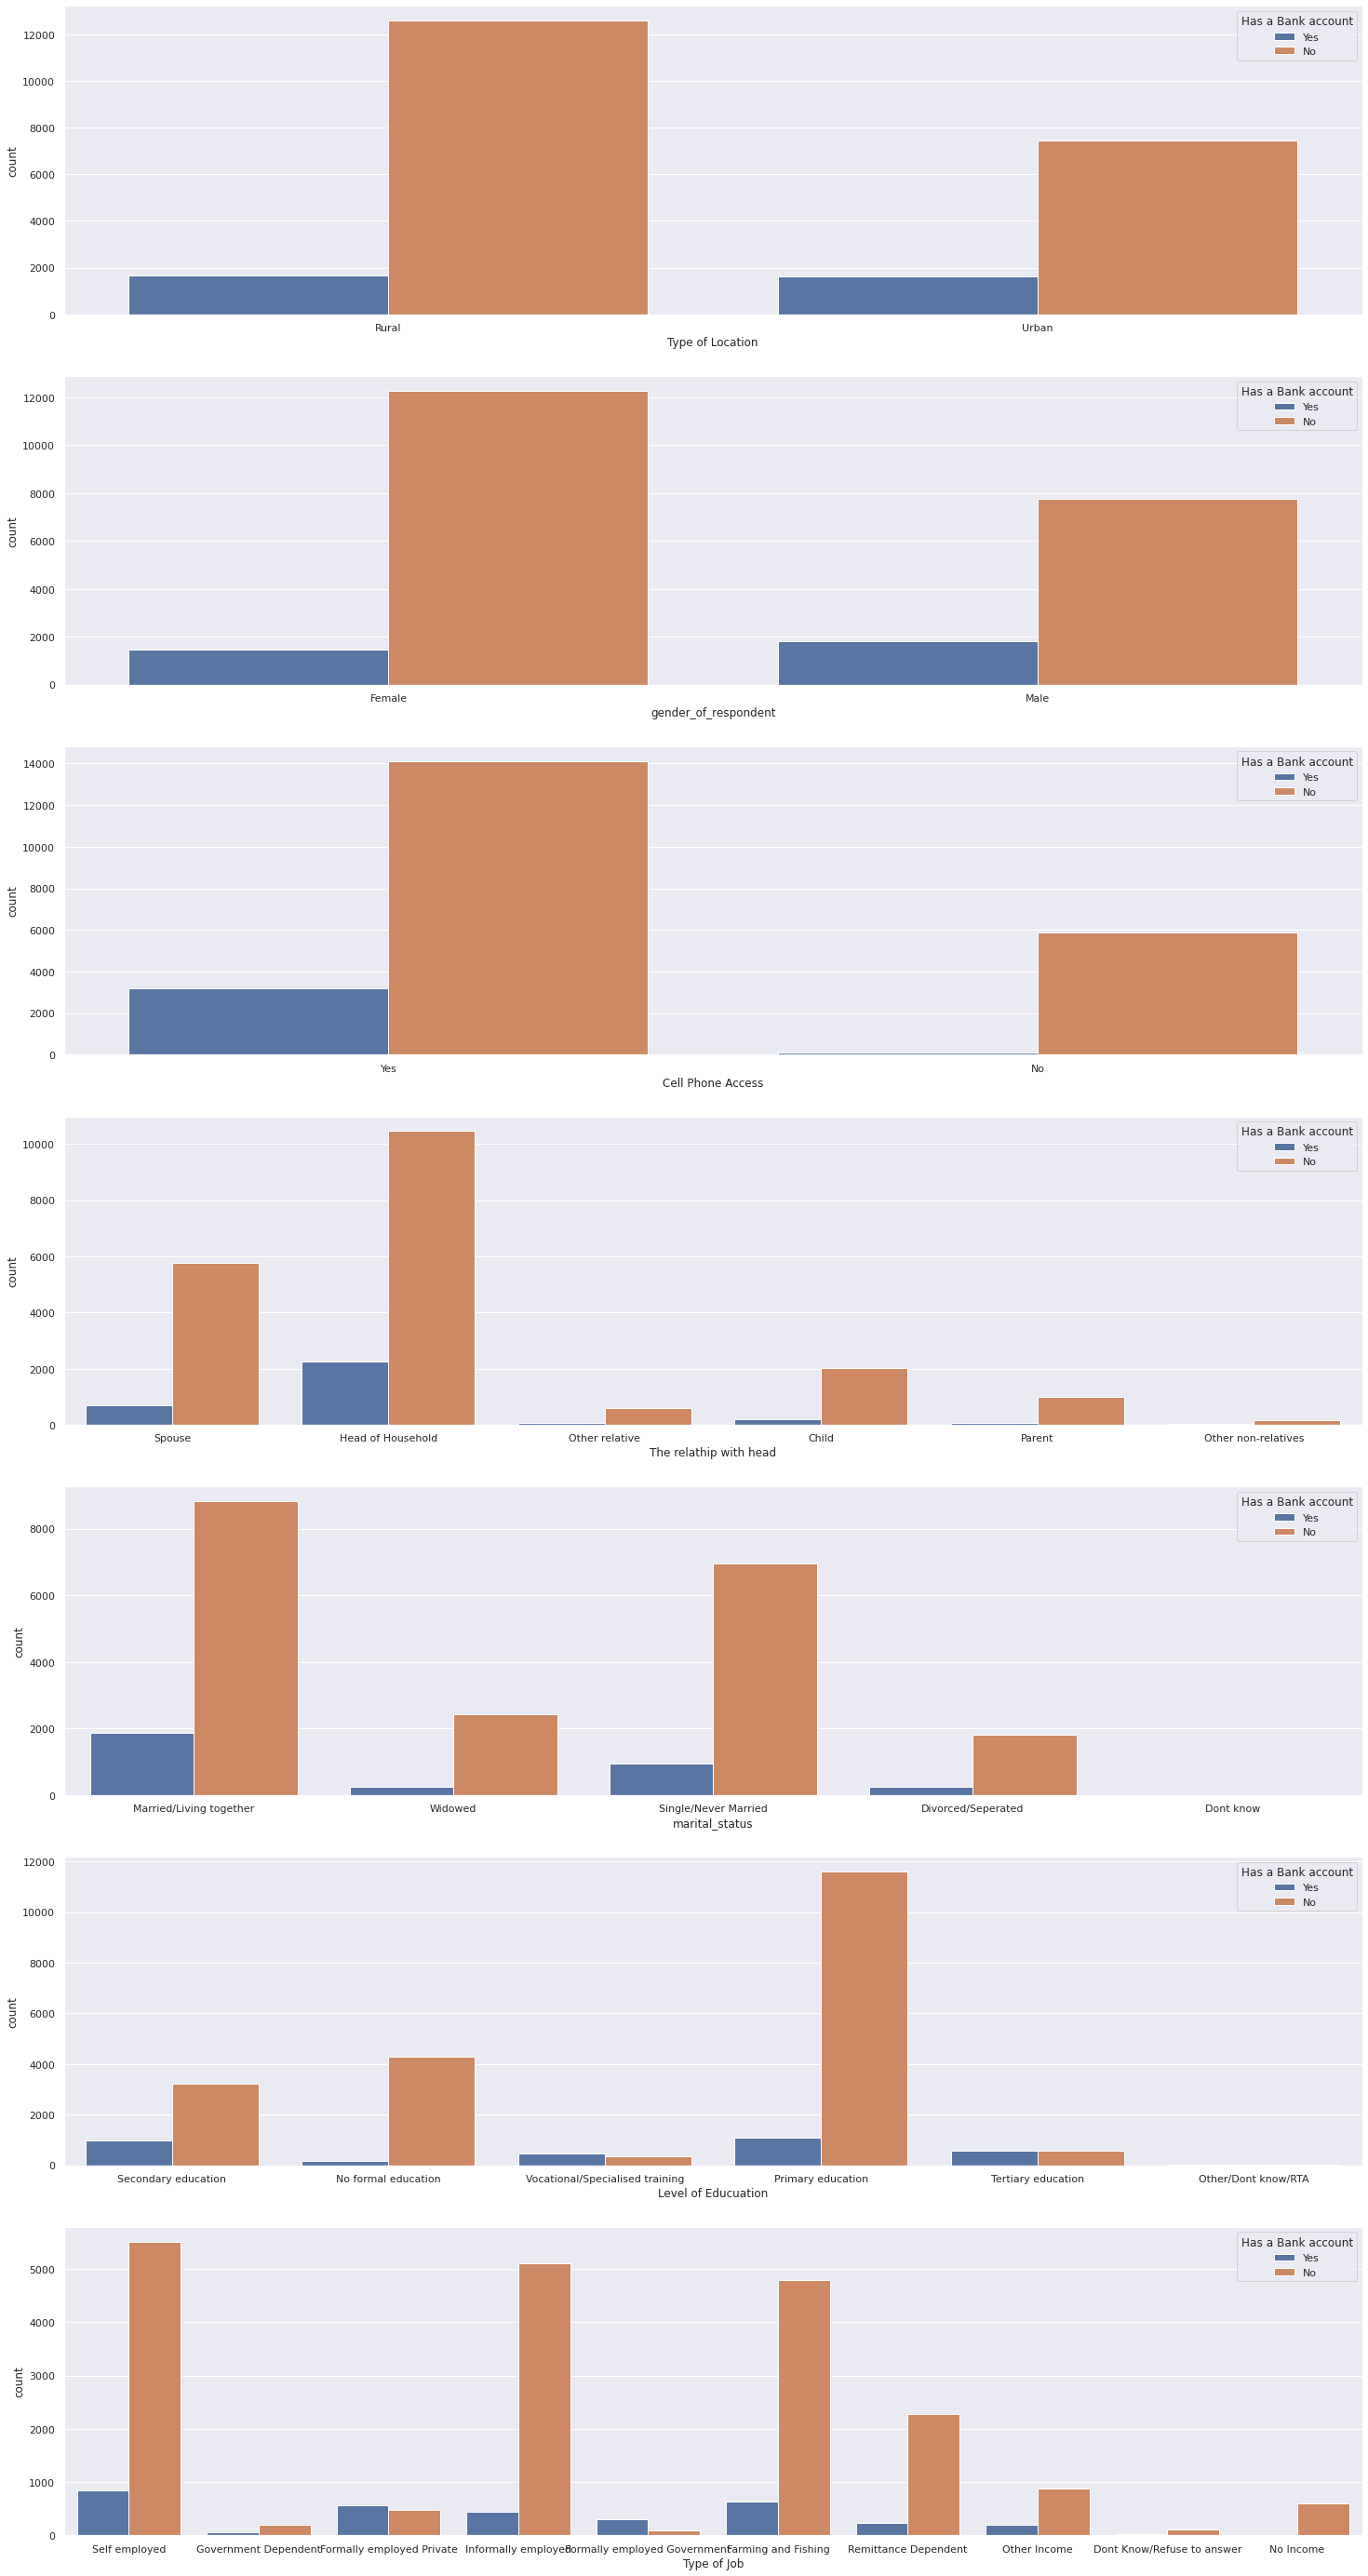

In [399]:
f, axes = plt.subplots(7, 1, figsize=[25, 50])

sns.countplot('Type of Location', hue= 'Has a Bank account', data=df1, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'Has a Bank account', data=df1, ax=axes[1])
sns.countplot('Cell Phone Access', hue= 'Has a Bank account', data=df1, ax=axes[2])
sns.countplot('The relathip with head', hue= 'Has a Bank account', data=df1, ax=axes[3])
sns.countplot('marital_status', hue= 'Has a Bank account', data=df1, ax=axes[4])
sns.countplot('Level of Educuation', hue= 'Has a Bank account', data=df1, ax=axes[5])
sns.countplot('Type of Job', hue= 'Has a Bank account', data=df1, ax=axes[6])

With the analysis above, it shows that more people that are self employed have more access to banking
Formally emmployed people have more account.
cell phone access also affected having bank accounts since most of the population with access to phones have bank accounts than those who dont.
Also most heads of househood have access to banking than the rest of the population
Most of the population with tertiary education have bank accounts
  


# ***Question 2: Hypothesis Testing***


# **Defining the question**

### a) PROBLEM STATEMENT

Null hypothesis: the average number of blue cars taken is not different that of the blue cars returned


Alternative hypothesis:  the average number of blue cars taken is different that of the blue cars returned








### b) **Defining the Metric for Success**


> The objective is to investigate the claim listed above and knowing whether or not the the average number of blue cars taken is different that of the blue cars returned


### c) **Understanding the context**

 we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

## d) Recording the Experimental Design

*   Defining the research question

*   Finding and dealing with outliers, anomalies, and missing data within the dataset.

*   Plot appropriate univariate and bivariate summaries recording our observations.

*   Implement the solution by performing hypothesis testing.
*  Challenge your solution by providing insights on how you can make improvements.
Defining the research question


## e) **Relevance of the data**

THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

# **Reading the Data**

In [400]:

import scipy.stats as stats
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   
%matplotlib inline
import seaborn as sns
sns.set()
import math

In [401]:
# reading in data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [402]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## Data Cleaning

In [403]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [404]:
# determining the number of records in the dataset
df.shape

(16085, 13)

In [405]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame
# ---
# 
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(data.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(9783, 13)
(16085, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [406]:
# checking for duplicates
data.duplicated().sum()

0

In [407]:
# checking for missing values
data.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [408]:
# Rename columns to use underscore and remove the white spaces
col_names = df.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

data.columns = col_names

In [409]:
data.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

# **Eploratory analysis**

In [410]:
data.shape

(9783, 13)

In [411]:
data.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [412]:
data.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [413]:
data.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
8258,92360,2,weekday,11,8
13633,94130,1,weekday,29,27
11252,93300,6,weekend,9,8
15648,95100,3,weekday,9,13
15051,94450,5,weekend,17,19
5615,92170,2,weekday,47,43
10570,93150,6,weekend,4,5
5343,92150,0,weekday,140,137
6662,92240,4,weekday,79,78
13737,94130,0,weekday,23,32


In [414]:
# Extract day type data
df2 = data[data.day_type == 'weekend']

In [415]:
df2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
15473,94800,5,weekend,126,140
10620,93170,6,weekend,47,50
13318,94110,5,weekend,29,31
4438,92000,5,weekend,207,194
6270,92220,5,weekend,109,108
7749,92320,6,weekend,77,94
14417,94230,5,weekend,47,46
6122,92210,6,weekend,106,99
14953,94410,6,weekend,32,34
5848,92190,5,weekend,82,67




*   Since the selection requires one set of data which is either weekends or weekdays, I chose to work with the wekends.






In [416]:
df2.shape

(2963, 5)

## Univariate analysis

In [417]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: dayofweek, dtype: float64

*   From the dataset, the days of the week are coded with 5 being saturday and 6 being sunday

In [418]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

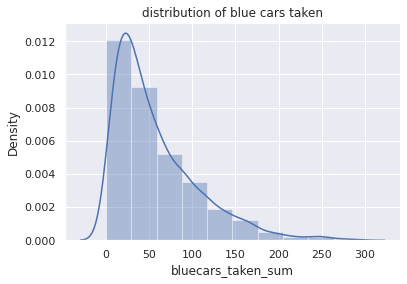

In [419]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

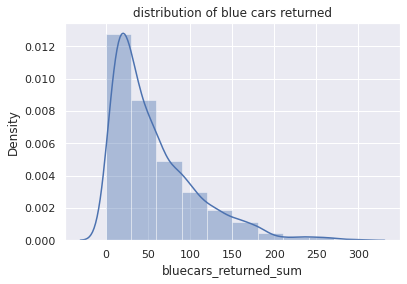

In [420]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

In [421]:
df2['postal_code'] = df2['postal_code'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [422]:
df2['dayofweek'] = df2['dayofweek'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Bivariate analysis

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 1800x1296 with 0 Axes>

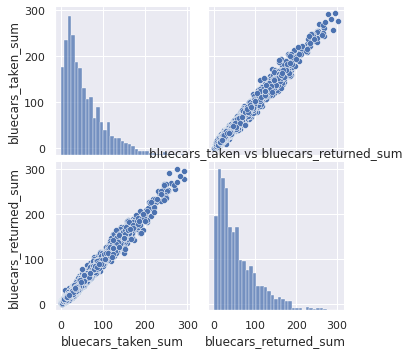

In [423]:
# Determine correlation between numeric features
plt.figure(figsize=(25,18))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [424]:
df2['bluecars_taken_sum'].corr(df2['bluecars_returned_sum'])

0.9906487464480561

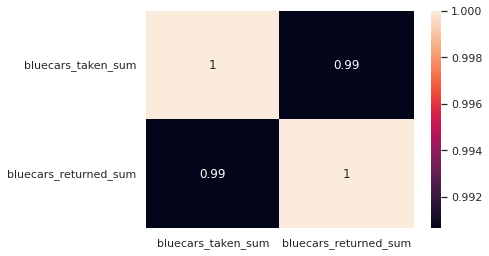

In [425]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

# **IMPLEMENTING THE SOLUTION**

## Hypothesis testing

In [426]:
##  Null hypothesis: 
      # the average number of blue cars taken is equal to that of the blue cars returned?
##  Alternative hypothesis:  
      # the average number of blue cars taken is not equal that of the blue cars returned

In [427]:
df2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [428]:
df2.dtypes

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [429]:
df2.drop(['day_type'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [430]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [431]:
df2.count()

postal_code              2963
dayofweek                2963
bluecars_taken_sum       2963
bluecars_returned_sum    2963
dtype: int64

# **stratified sampling**

In [432]:
# Stratified sample
sample = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))
sample

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
6770,92250,5,79,85
7057,92270,5,43,39
11822,93370,5,3,4
11155,93260,5,68,66
7653,92320,5,82,93
...,...,...,...,...
8321,92360,6,1,5
7044,92270,6,32,37
14963,94410,6,22,26
4488,92000,6,169,174


In [433]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [434]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [435]:
# sample mean
b = sample['bluecars_taken_sum'].mean()
b

54.436762225969645

In [436]:
e = sample['bluecars_returned_sum'].mean()
e

54.35075885328836

In [437]:
# sample standard deviation
c = sample['bluecars_taken_sum'].std()
c

47.0958245155174

In [438]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.5179729643664122

In [439]:
#calculating the p value
from scipy.stats import norm
p_value = stats.norm.cdf(zscore)
p_value

0.06451060716255158

In [440]:
#interpretation of the p value
if p_value < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [441]:
# point estimation
# population_mean() - sample_mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - sample['bluecars_taken_sum'].mean()

71.4901883491003

In [442]:
sample_mean = sample['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print('z-critical value:')              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(33.312856486627105, 75.56066796531218)


# **CONCLUSION**



> We fail to reject the null hypothesis becase there is not sufficient evidence to prove that the average mean of the bluecars taken and returned are equal.

